
## Question 2 Objectives

-  Build a DNN model for Covertype Dataset to check covertype output - Multiclassification problem
-  Understand basic DNN model building process using Keras
-  Analyze model performance and capacity vs generalization tradeoff
-  Modify models to reduce overfitting and improve performance
-  Analyze results and explore improvements to model

## Step 1: Import Libraries

In [0]:
#Importing all necessory librariies

from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.14.0


##Step 2 : Import Data

In [0]:
#import data from source

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

concrete_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz", 
                                 sep=",",header=None, names = ['Elevation', 'Aspect','Slope','Horizontal_Distance_To_HydrologyHorizontal','Vertical_Distance_To_HydrologyVertical',
                                                               'Horizontal_Distance_To_RoadwaysHorizontal','Hillshade_9amHill','Hillshade_NoonHill','Hillshade_3pmHill',
                                                               'Horizontal_Distance_To_Fire_PointsHorizontal','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3',
                                                               'Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6',
                                                               'Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13',
                                                               'Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                                                               'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27',
                                                               'Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34',
                                                               'Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type'])

concrete_dataframe.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_HydrologyHorizontal,Vertical_Distance_To_HydrologyVertical,Horizontal_Distance_To_RoadwaysHorizontal,Hillshade_9amHill,Hillshade_NoonHill,Hillshade_3pmHill,Horizontal_Distance_To_Fire_PointsHorizontal,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


##Step 3 : Preprocess data


In [0]:
#Divide dataframe into three different dataframes (categorical input, continuous input and output) to perform normalisation operation


concrete_continuos_input_col = ['Elevation', 'Aspect','Slope','Horizontal_Distance_To_HydrologyHorizontal','Vertical_Distance_To_HydrologyVertical','Horizontal_Distance_To_RoadwaysHorizontal',
                                'Hillshade_9amHill','Hillshade_NoonHill','Hillshade_3pmHill','Horizontal_Distance_To_Fire_PointsHorizontal']


concrete_categorical_input_col = ['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5',
                                  'Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15',
                                  'Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                                  'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35',
                                  'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']

concrete_continuos_input = concrete_dataframe[concrete_continuos_input_col]
print(concrete_continuos_input)

concrete_categorical_input = concrete_dataframe[concrete_categorical_input_col]
print(concrete_categorical_input)

        Elevation  ...  Horizontal_Distance_To_Fire_PointsHorizontal
0            2596  ...                                          6279
1            2590  ...                                          6225
2            2804  ...                                          6121
3            2785  ...                                          6211
4            2595  ...                                          6172
...           ...  ...                                           ...
581007       2396  ...                                           837
581008       2391  ...                                           845
581009       2386  ...                                           854
581010       2384  ...                                           864
581011       2383  ...                                           875

[581012 rows x 10 columns]
        Wilderness_Area1  Wilderness_Area2  ...  Soil_Type39  Soil_Type40
0                      1                 0  ...            0          

In [0]:
#Target Output - subtracting 1 from output as output layer requires output from starting from 0

concrete_target_col = ["Cover_Type"]
concrete_target = concrete_dataframe[concrete_target_col] - 1
print(concrete_target)

        Cover_Type
0                4
1                4
2                1
3                1
4                4
...            ...
581007           2
581008           2
581009           2
581010           2
581011           2

[581012 rows x 1 columns]


In [0]:
# Choose the first 406709 examples for training.

training_continuous_input = concrete_continuos_input.head(406709)
training_categorical_input = concrete_categorical_input.head(406709)
training_output = concrete_target.head(406709)

# Choose the last 174303 examples for validation.

validation_continuous_input = concrete_continuos_input.tail(174303)
validation_categorical_input = concrete_categorical_input.tail(174303)
validation_output = concrete_target.tail(174303)

In [0]:
#Standardize features by removing the mean and scaling to unit variance for training and validation dataframes 

scaler = StandardScaler().fit(training_continuous_input.values)
scaledf = scaler.transform(training_continuous_input.values)
scaled_training_continuous = pd.DataFrame(scaledf, index=training_continuous_input.index, columns=training_continuous_input.columns)

vscaled = scaler.transform(validation_continuous_input.values)
scaled_validation_continuous = pd.DataFrame(vscaled, index=validation_continuous_input.index, columns=validation_continuous_input.columns)


# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(scaled_training_continuous.describe())
print("Validation examples summary:")
display.display(scaled_validation_continuous.describe())

print("Training targets summary:")
display.display(training_output.describe())
print("Validation targets summary:")
display.display(validation_output.describe())

Training examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_HydrologyHorizontal,Vertical_Distance_To_HydrologyVertical,Horizontal_Distance_To_RoadwaysHorizontal,Hillshade_9amHill,Hillshade_NoonHill,Hillshade_3pmHill,Horizontal_Distance_To_Fire_PointsHorizontal
count,406709.0,406709.0,406709.0,406709.0,406709.0,406709.0,406709.0,406709.0,406709.0,406709.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.7,-1.3,-1.8,-1.3,-3.7,-1.5,-7.9,-9.9,-3.7,-1.5
25%,-0.5,-0.8,-0.7,-0.8,-0.7,-0.8,-0.5,-0.5,-0.6,-0.7
50%,0.1,-0.3,-0.2,-0.2,-0.3,-0.2,0.2,0.1,0.0,-0.2
75%,0.7,0.9,0.6,0.5,0.4,0.7,0.7,0.7,0.6,0.4
max,3.3,1.9,6.6,5.5,10.1,2.7,1.5,1.6,3.0,3.5


Validation examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_HydrologyHorizontal,Vertical_Distance_To_HydrologyVertical,Horizontal_Distance_To_RoadwaysHorizontal,Hillshade_9amHill,Hillshade_NoonHill,Hillshade_3pmHill,Horizontal_Distance_To_Fire_PointsHorizontal
count,174303.0,174303.0,174303.0,174303.0,174303.0,174303.0,174303.0,174303.0,174303.0,174303.0
mean,0.6,0.2,0.2,0.2,0.2,-0.4,-0.1,0.1,0.1,-0.3
std,0.9,1.0,0.9,1.1,1.2,0.7,1.0,1.0,1.0,0.7
min,-2.3,-1.3,-1.8,-1.3,-3.9,-1.5,-7.9,-11.4,-3.7,-1.5
25%,0.1,-0.8,-0.5,-0.7,-0.6,-0.9,-0.7,-0.5,-0.6,-0.8
50%,0.8,0.1,0.0,-0.1,-0.2,-0.5,-0.0,0.3,0.2,-0.4
75%,1.2,1.1,0.8,0.8,0.7,0.0,0.6,0.9,0.9,0.1
max,3.4,1.9,6.9,5.2,7.3,1.7,1.5,1.6,2.9,2.6


Training targets summary:


,Cover_Type
count,406709.0
mean,1.1
std,1.3
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,6.0


Validation targets summary:


,Cover_Type
count,174303.0
mean,0.9
std,1.5
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,6.0


In [0]:
#Combining dataframe for categorical and continuous variables 

training_combined = pd.concat([scaled_training_continuous, training_categorical_input],axis=1)
validation_combined =  pd.concat([scaled_validation_continuous, validation_categorical_input], axis=1)

## Step 4.1: Building First model 

In [0]:
#Building first model for binary classification 

first_model = keras.Sequential([keras.layers.Dense(32,activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
                       keras.layers.Dense(32,activation=tf.nn.relu,),
                       keras.layers.Dense(7, activation= "softmax")  # for multiclassification 3, activation=tf.softmax
                        ])

optimizer = tf.train.RMSPropOptimizer(0.001)  # algorithm for minimising the error
#optimizer = tf.train.AdamOptimizer()

first_model.compile(loss='sparse_categorical_crossentropy', # mean squared error
                optimizer=optimizer,
                metrics=['accuracy'])  #mean absolute error
# no. of neurons in hidden layer=input+output/2
# or 2/3 Input +output or 2 times input relu has to do with optimisation, easier to compute gradients

## Step 4.2: Building L1 model 

In [0]:
#Building L1 model for binary classification 

l1_model = keras.Sequential([
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(16,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(7, activation= "softmax")
  ])


l1_model.compile(loss='sparse_categorical_crossentropy', # mean squared error
                optimizer=optimizer,
                metrics=['accuracy'])  #mean absolute error

In [0]:
print(training_output)
print(validation_output)

        Cover_Type
0                5
1                5
2                2
3                2
4                5
...            ...
406704           2
406705           2
406706           2
406707           2
406708           2

[406709 rows x 1 columns]
        Cover_Type
406709           2
406710           2
406711           2
406712           2
406713           2
...            ...
581007           3
581008           3
581009           3
581010           3
581011           3

[174303 rows x 1 columns]


## Step 4. 3: Building Baseline model  for covertype dataset

In [0]:
validation_output['Cover_Type'].value_counts()

0    88210
1    64372
6     9857
2     8034
5     3106
4      724
Name: Cover_Type, dtype: int64

In [0]:
accuracy_original= (validation_output['Cover_Type'].value_counts()[0]/validation_output['Cover_Type'].count())*100
print("Accuracy: ",accuracy_original,"%")

Accuracy:  44.79785201631641 %


##Step 5: Fit Model (First model and L1 model)

In [0]:

class PrintDot(keras.callbacks.Callback): # prints dot at the end of every epoch
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50  # number of times the model runs with different orders of 83 records
tf.set_random_seed(1)

# Store training stats

f1_history = first_model.fit(training_combined, training_output, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_output), verbose=0,
                    callbacks=[PrintDot()])

l1_history = l1_model.fit(training_combined, training_output, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_output), verbose=0,
                    callbacks=[PrintDot()])


..................................................
..................................................

In [0]:
print(" l1 model maximum accuracy:",max(l1_history.history['val_acc']))
print(" f1 model maximum accuracy:",max(f1_history.history['val_acc']))

 l1 model maximum accuracy: 0.36931092
 f1 model maximum accuracy: 0.6088306


##Step 7: Plot Results

### 1. Graph for accuracy of all models

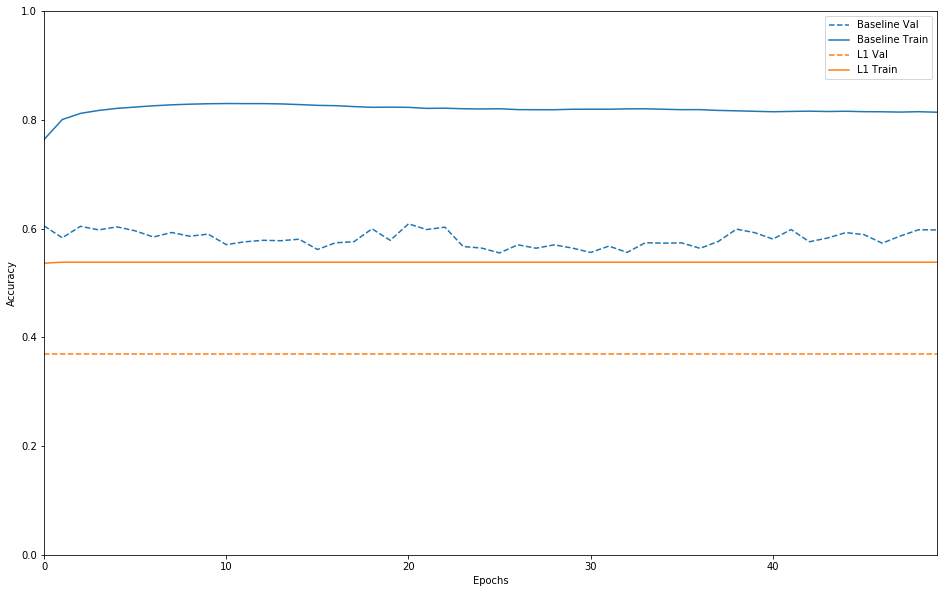

In [0]:
import matplotlib.pyplot as plt

def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  #plt.ylabel(key.replace('_',' ').title())
  plt.ylabel('Accuracy')
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', f1_history),
              ('L1', l1_history)])

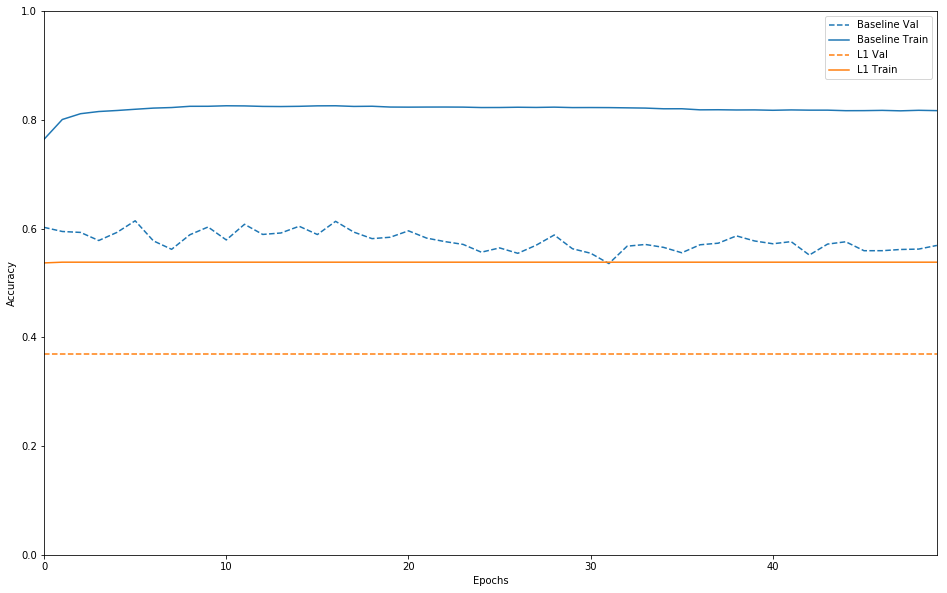

In [0]:
import matplotlib.pyplot as plt

def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  #plt.ylabel(key.replace('_',' ').title())
  plt.ylabel('Accuracy')
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', f1_history),
              ('L1', l1_history)])

#Model2:  

In [0]:
#Trying model with less number of neurons 

model2 = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(7,activation='softmax')
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model2.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [0]:
f2_history = model2.fit(training_combined, training_output, epochs=500,
                    validation_data= (validation_combined, validation_output), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [0]:
print(" f1 model maximum accuracy:",max(f2_history.history['val_acc']))

 f1 model maximum accuracy: 0.63731545


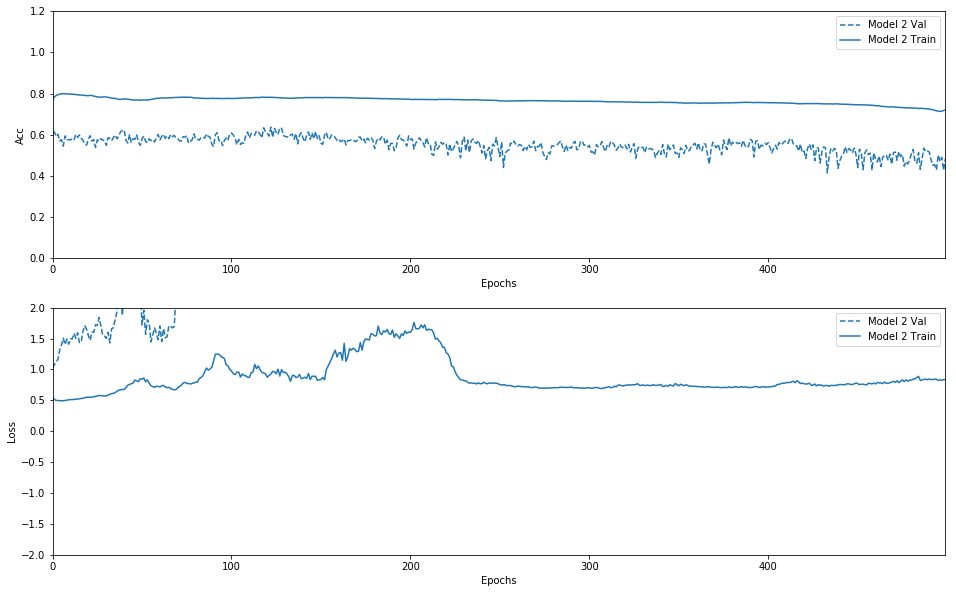

In [0]:
import matplotlib.pyplot as plt


def plot_history1(histories, key='acc'):
  plt.figure(figsize=(16,10))
  plt.subplot(2,1,1)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.2])
  
def plot_history2(histories, key='loss'):
  plt.subplot(2,1,2)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-2,2])


# Plot history Multiple
plot_history1([('Model 2', f2_history)])
plot_history2([('Model 2', f2_history)])          

#Model3

In [0]:
 #Variation 2 with BatchNormalization
  
    model3 = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(7,activation='softmax')
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model3.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [0]:
f3_history = model3.fit(training_combined, training_output, epochs=50,
                    validation_data= (validation_combined, validation_output), verbose=0,
                    callbacks=[PrintDot()])


..................................................

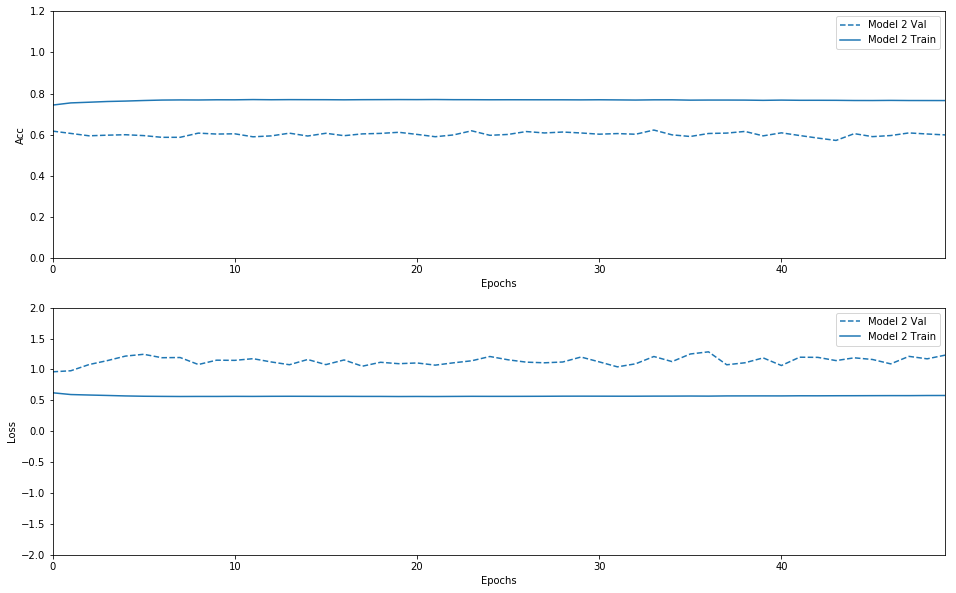

In [0]:
import matplotlib.pyplot as plt


def plot_history1(histories, key='acc'):
  plt.figure(figsize=(16,10))
  plt.subplot(2,1,1)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.2])
  
def plot_history2(histories, key='loss'):
  plt.subplot(2,1,2)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-2,2])


# Plot history Multiple
plot_history1([('Model 2', f3_history)])
plot_history2([('Model 2', f3_history)])          

In [0]:
print(" f3 model maximum accuracy:",max(f3_history.history['val_acc']))

 f3 model maximum accuracy: 0.62281775


#Model6

In [0]:
#variation with more layers 

model6 = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dense(65, activation=tf.nn.relu),
    keras.layers.Dense(65, activation=tf.nn.relu),
    keras.layers.Dense(65, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(65, activation=tf.nn.relu),
    keras.layers.Dense(7,activation='softmax')
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model6.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [0]:

class PrintDot(keras.callbacks.Callback): # prints dot at the end of every epoch
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

tf.set_random_seed(1)

f6_history = model6.fit(training_combined, training_output, epochs=500,
                    validation_data= (validation_combined, validation_output), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [0]:
print(" f6 model maximum accuracy:",max(f6_history.history['val_acc']))

 f6 model maximum accuracy: 0.62180513


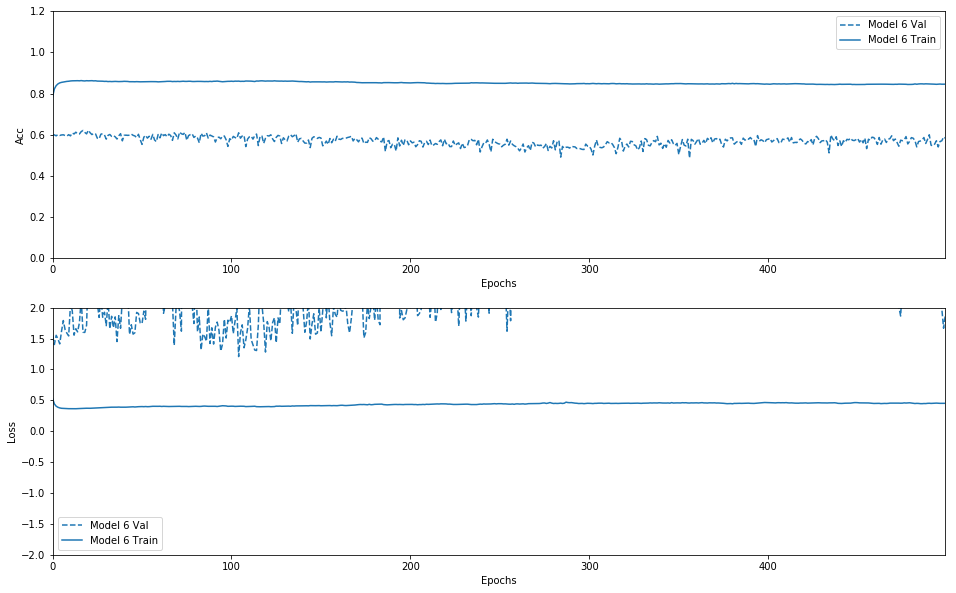

In [0]:
import matplotlib.pyplot as plt


def plot_history1(histories, key='acc'):
  plt.figure(figsize=(16,10))
  plt.subplot(2,1,1)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.2])
  
def plot_history2(histories, key='loss'):
  plt.subplot(2,1,2)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-2,2])


# Plot history Multiple
plot_history1([('Model 6', f6_history)])
plot_history2([('Model 6', f6_history)])          

#Preprocessing variation

In [0]:
#Changing preprocessing - using diferent split for Training and validation dataset 

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

covtype_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz", sep=",",header=None,names =["Elevation",
     "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am",
     "Hillshade_Noon","Hillshade_3pm ","Horizontal_Distance_To_Fire_Points","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4",                                                                                                                         
    "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4", "Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12",
     "Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23",
     "Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32", "Soil_Type33",
     "Soil_Type34", "Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39",
     "Soil_Type40","Cover_Type"])

covtype_dataframe = covtype_dataframe.reindex(
    np.random.permutation(covtype_dataframe.index))

def preprocess_features(covtype_dataframe):
  """Prepares input features from online shopper intention test data set.

  Args:
    online_shoppers_dataframe: A Pandas DataFrame expected to contain data
      from the online shopper intention test data set.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = covtype_dataframe[
    ["Elevation",
     "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am",
     "Hillshade_Noon","Hillshade_3pm ","Horizontal_Distance_To_Fire_Points","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4",                                                                                                                         
    "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4", "Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12",
     "Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23",
     "Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32", "Soil_Type33",
     "Soil_Type34", "Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39",
     "Soil_Type40"]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(covtype_dataframe):
  """Prepares target features (i.e., labels) from  housing data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = covtype_dataframe["Cover_Type"]
  return output_targets

categorical_columns=["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4",                                                                                                                         
    "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4", "Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12",
     "Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23",
     "Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32", "Soil_Type33",
     "Soil_Type34", "Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39",
     "Soil_Type40"]

numerical_columns=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
     "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm ","Horizontal_Distance_To_Fire_Points"]

# Choose the first 406708 examples for training.
training_examples = preprocess_features(covtype_dataframe.head(406708))
training_targets = preprocess_targets(covtype_dataframe.head(406708))

training_examples_values=training_examples[categorical_columns]
training_numerical_values=training_examples[numerical_columns]

scaler = StandardScaler().fit(training_numerical_values.values)
scaledf = scaler.transform(training_numerical_values.values)
training_numerical_values_examples = pd.DataFrame(scaledf, index=training_numerical_values.index, columns=training_numerical_values.columns)
training_examples=pd.concat([training_numerical_values_examples,training_examples_values], axis=1)

# Choose the last 174303 examples for validation.
validation_examples = preprocess_features(covtype_dataframe.tail(174303))
validation_examples_values=validation_examples[categorical_columns]
validation_numerical_values=validation_examples[numerical_columns]

scaler = StandardScaler().fit(validation_numerical_values.values)
scaledf = scaler.transform(validation_numerical_values.values)
validation_numerical_values_examples = pd.DataFrame(scaledf, index=validation_numerical_values.index, columns=validation_numerical_values.columns)
validation_examples=pd.concat([validation_numerical_values_examples,validation_examples_values], axis=1)

validation_targets = preprocess_targets(covtype_dataframe.tail(174303))


#Model 7

In [0]:
f7_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8,activation='softmax')
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

f7_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
tf.set_random_seed(1)

# Store training stats
f7_history = f7_model.fit(training_examples, training_targets, epochs=EPOCHS,
                   validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [0]:
print(" f7 model maximum accuracy:",max(f7_history.history['val_acc']))

 f7 model maximum accuracy: 0.7848287


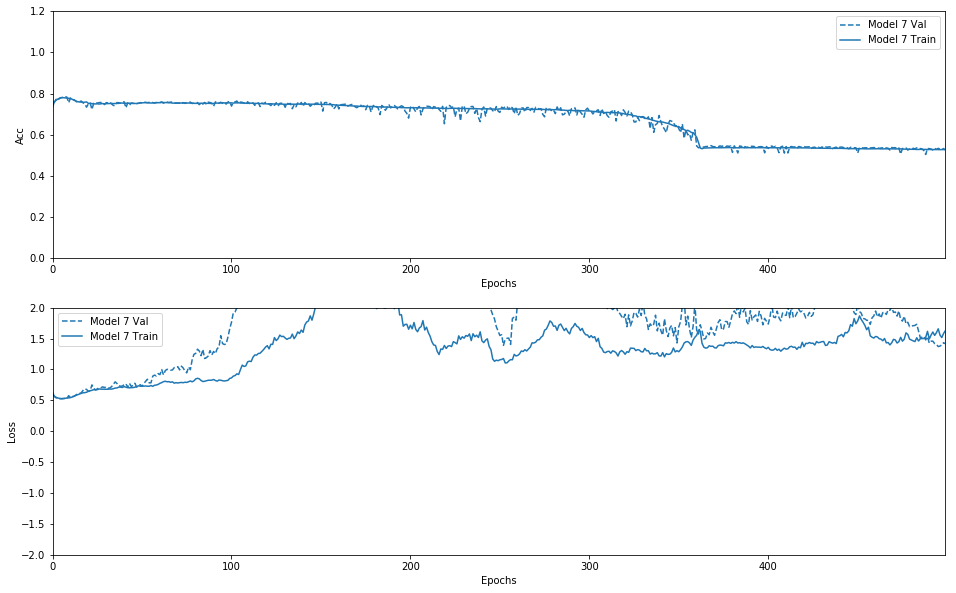

In [0]:
import matplotlib.pyplot as plt


def plot_history1(histories, key='acc'):
  plt.figure(figsize=(16,10))
  plt.subplot(2,1,1)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.2])
  
def plot_history2(histories, key='loss'):
  plt.subplot(2,1,2)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-2,2])


# Plot history Multiple
plot_history1([('Model 7', f7_history)])
plot_history2([('Model 7', f7_history)])          

#Model 8

In [0]:
f8_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8,activation='softmax')
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

f8_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
f8_history = f8_model.fit(training_examples, training_targets, epochs=EPOCHS,
                   validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [0]:
print(" f8 model maximum accuracy:",max(f8_history.history['val_acc']))

 f8 model maximum accuracy: 0.8020344


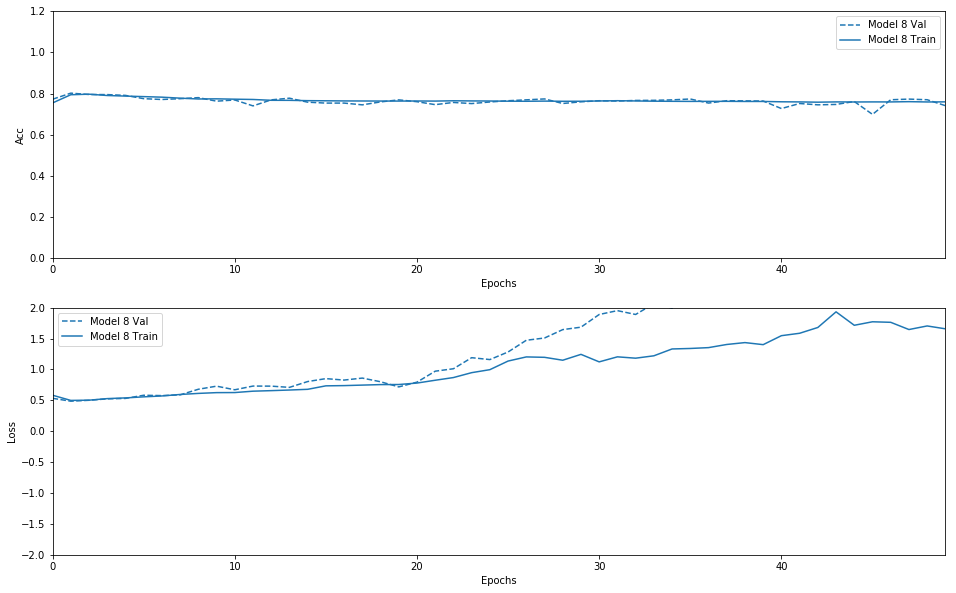

In [0]:
import matplotlib.pyplot as plt


def plot_history1(histories, key='acc'):
  plt.figure(figsize=(16,10))
  plt.subplot(2,1,1)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1.2])
  
def plot_history2(histories, key='loss'):
  plt.subplot(2,1,2)
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-2,2])


# Plot history Multiple
plot_history1([('Model 8', f8_history)])
plot_history2([('Model 8', f8_history)])          

##Model Comparision with accuracy

Previous Submission best Model: 56.91%

First_Model	: 60.88% 

L1_Model: 36.93%

Model2	: 63.73%

Model3	: 62.28%

Model6	: 62.18%

Model7	: 78.48%

Model8  : 80.20%
		
						


## Analysis of all models (Model Comparison for Question 2)

### Previous submission Results 

- From above models, we can see that, we are getting accuracy of 44.79%  with baseline model. But after building and fitting all DNN models we are getting accuracy more than baseline model for all models (first_model, l1_model).

- Best model is : first_model with accuracy : 56.91% is the best model.

###Results after changes made in models

- From above models, we can see that, we are getting accuracy of 44.79%  with baseline model. But after building and fitting all DNN models we are getting accuracy more than baseline model for all models (first_model, l1_model, Model2, Model3, Model6, Model7, Model8).

- Best model is : Model8  with accuracy : 80.20% is the best model.

- Accuracy increased from 56.91 of previous submitted model to 80.20% now with all preprocessing and model changes. 